In [49]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from PIL import Image
import numpy as np
import os
import joblib
import glob


# Path to the directory containing training images
image_dir = r"C:\Users\jingl\Kim\dataset\train2"

# Get a list of subdirectories (class labels)
class_labels = os.listdir(image_dir)


print(class_labels)

['cats', 'dogs']


In [33]:
# Initialize lists to store preprocessed images and labels
preprocessed_images = []
labels = []

# Iterate through each subdirectory (class label)
for label in class_labels:
    class_path = os.path.join(image_dir, label)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        img = Image.open(img_path)
        
        # Preprocess the image (resize and convert to grayscale)
        img = img.resize((100, 100))  # Resize to a common size
        img = img.convert('L')  # Convert to grayscale
        
        # Convert the image to a numpy array and flatten it
        img_array = np.array(img).flatten()
        preprocessed_images.append(img_array)
        labels.append(label)

# Convert the lists of preprocessed images and labels to arrays
X = np.array(preprocessed_images)
y = np.array(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree model
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6066666666666667


In [37]:
#Save the train model
model_path = r'C:\Users\jingl\Kim\decisiontree.pkl'
joblib.dump(model,model_path)

['C:\\Users\\jingl\\Kim\\decisiontree.pkl']

In [61]:
def extract_features(image):
    # Example: Convert the image to grayscale and resize it to a fixed size
    gray_image = image.convert('L')
    resized_image = gray_image.resize((100, 100))
    
    # Flatten the image into a 1D array
    feature_vector = np.array(resized_image).flatten()
    
    return feature_vector

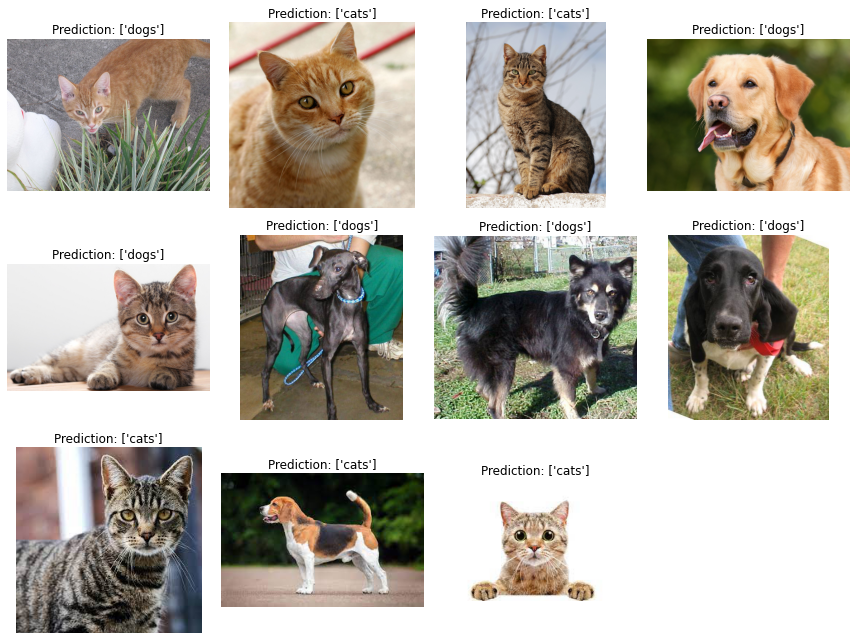

In [64]:
# Load the saved model
model_path = r'C:\Users\jingl\Kim\decisiontree.pkl'
saved_model = joblib.load(model_path)

# Use the saved model for predictions and subplot visualization
new_images_path = r'C:\Users\jingl\OneDrive\Desktop\single_prediction\*.jpg'
new_images = glob.glob(new_images_path)

num_images = len(new_images)
num_rows = (num_images + 3) // 4  # Calculate the number of rows needed for the grid

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(12, 3*num_rows))

for i, image_path in enumerate(new_images):
    image = Image.open(image_path)
    feature_vector = extract_features(image)
    
    # Make prediction using the loaded model
    prediction = saved_model.predict([feature_vector])
    
    # Calculate the subplot index
    row_idx = i // 4
    col_idx = i % 4
    
    # Display the image and prediction
    axes[row_idx, col_idx].imshow(image)
    axes[row_idx, col_idx].set_title(f'Prediction: {prediction}')
    axes[row_idx, col_idx].axis('off')

# Remove any empty subplots if the number of images is not a multiple of 4
if num_images % 4 != 0:
    for i in range(num_images, num_rows * 4):
        axes[num_rows-1, i % 4].axis('off')

plt.tight_layout()
plt.show()